# **Validation model for the routine use of point of care bilirubin in the neonatal unit**

**Point of care (POC)** is an investigation performed at the cotside by the caring team (doctors, nurses) to almost immediately answer a clinical question, with critical impact on clinical management. As an example POC echocardiography can identify tamponnade and guide pericardocenthesis. POC lung ultrasound allows immediate diagnosis of pneumothorax and rapid air drainage.

Our level 2 neonatal Unit has recently acquired POC blood bilirubine (POC bili) measurement. Many neonatal units have already this option available, but very few studied a correlation model between the gold standard laboratory bilirubin (Lab bili) and the POC bilirubin. Our POC machine was previsously validated in 3 different hospitals, and no adjustment was required by the manufacturer for implementation.

**Objective of this study** was to describe the correlation between POC bili  and Laby bili and if necessary to build a model that predicts well best Lab bili from POC measurement. Results of the Lab bili are available after 2 to 4 hours, needs a porter to be taken to the lab, increasing costs and delaying  therapeutic management, such as phototherapy. It also delays home discharge for patients waiting for the rebound level.

On the other hand, relying totally on POC bili to make clinical decision in a very specific population required to assess the safety and the performance of the new test.

We also studied the **impact of high hemoglobin** on the difference between Lab bili and POC bili

**Many neonatal units use POC bili without any correction**. I have thus designed a program to identify the best prediction model that can be used in any neonatal unit who wants to predict best its Lab bili based on the POC bili. **This program can be used for any new point of care measurement implemented in a clinical area**

**I would like to thank all neonatal nurses from our unit who collected data prospectively from 100 patients**

**Features:**

Date et heure: day and time of sampling

Etiquette: patient anonymised number

Bili TC: transcutaneous bilirubin

Bili Tcmin: minimum transcutaneous bilirubin

BiliTC max: maximum transcutaneous bilirubin

Bili TC moy: mean transcutaneous bilirubin

Bili sang labo mg/l: Lab bili in mg/l

Bili sang labo µmol/l: Lab bili in µmol/l

Bili sang capillaire µmol/l: POC bili in µmol/l

Bili sang capillaire mg/l: POC bili in mg/l

Bili sang capillaire mg/dl: POC bili in mg/l

Diff: difference between lab and POC bili

Hb (g/dl: Hb level in g/dl

Unnamed: 15: comments




In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
# Importing necessary modules: the usual suspects!
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import numpy as np
import pandas as pd
import pydotplus


import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing, tree
import statsmodels

from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

#import fancyimpute
import missingno as mn

import io
import urllib.request as req
import zipfile

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import data
df = pd.read_excel('/content/drive/MyDrive/Bilirubine/2307Bilirubine (1).xlsx')
df.head()

,Unnamed: 0,Date et heure,Etiquette,Bili TC,bili Tcmin,biliTC max,bili TC moy,bili TC moy.1,Bili sang labo mg/l,Bili sang labo µmol/l,Bili sang capillaire µmol/l,Bili sang capillaire mg/l,Bili sang capillaire mg/dl,Diff,Hb (g/dl,Unnamed: 15
0,1,2024-03-15,1000065793,110/89,110.0,89.0,99.5,58.529412,62.882353,106.90,93.5,55.0,5.5,7.882353,16,NaN
1,2,2024-03-17,1000065883,141,NaN,NaN,141,82.941176,84.000000,142.80,127.5,75.0,7.5,9.000000,17,NaN
2,3,2024-03-18,1000065883,186,NaN,NaN,186,109.411765,167.800000,285.26,278.8,164.0,16.4,3.800000,17,NaN
3,4,2024-03-20,1000065795,NaN,NaN,NaN,NaN,NaN,142.000000,241.40,227.8,134.0,13.4,8.000000,20.3,NaN
4,5,2024-03-21,1000065883,204/256,204.0,256.0,230,135.294118,154.700000,262.99,241.4,142.0,14.2,12.700000,17,NaN


In [5]:
#drop first 5 columns
df = df.drop(df.columns[0:9], axis=1)
df.head()

,Bili sang labo µmol/l,Bili sang capillaire µmol/l,Bili sang capillaire mg/l,Bili sang capillaire mg/dl,Diff,Hb (g/dl,Unnamed: 15
0,106.90,93.5,55.0,5.5,7.882353,16,NaN
1,142.80,127.5,75.0,7.5,9.000000,17,NaN
2,285.26,278.8,164.0,16.4,3.800000,17,NaN
3,241.40,227.8,134.0,13.4,8.000000,20.3,NaN
4,262.99,241.4,142.0,14.2,12.700000,17,NaN


In [6]:
#drop column bili TC moy.1
df = df.drop('Bili sang capillaire mg/l', axis=1)
df.head()


,Bili sang labo µmol/l,Bili sang capillaire µmol/l,Bili sang capillaire mg/dl,Diff,Hb (g/dl,Unnamed: 15
0,106.90,93.5,5.5,7.882353,16,NaN
1,142.80,127.5,7.5,9.000000,17,NaN
2,285.26,278.8,16.4,3.800000,17,NaN
3,241.40,227.8,13.4,8.000000,20.3,NaN
4,262.99,241.4,14.2,12.700000,17,NaN


In [7]:
#drop column Bili sang capillaire µmol/l
df = df.drop('Bili sang capillaire µmol/l', axis=1)
df.head()

,Bili sang labo µmol/l,Bili sang capillaire mg/dl,Diff,Hb (g/dl,Unnamed: 15
0,106.90,5.5,7.882353,16,NaN
1,142.80,7.5,9.000000,17,NaN
2,285.26,16.4,3.800000,17,NaN
3,241.40,13.4,8.000000,20.3,NaN
4,262.99,14.2,12.700000,17,NaN


In [8]:
#drop column 6
df = df.drop('Unnamed: 15', axis=1)
df.head()


,Bili sang labo µmol/l,Bili sang capillaire mg/dl,Diff,Hb (g/dl
0,106.90,5.5,7.882353,16
1,142.80,7.5,9.000000,17
2,285.26,16.4,3.800000,17
3,241.40,13.4,8.000000,20.3
4,262.99,14.2,12.700000,17


In [9]:
#column list
df.columns


Index(['Bili sang labo µmol/l', 'Bili sang capillaire mg/dl', 'Diff',
       'Hb (g/dl'],
      dtype='object')

In [10]:
# Get the characteristics of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Bili sang labo µmol/l       95 non-null     float64
 1   Bili sang capillaire mg/dl  95 non-null     float64
 2   Diff                        95 non-null     float64
 3   Hb (g/dl                    94 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.1+ KB


In [11]:
#Store the dataframe into a working copy
df1 = df.copy(deep=True)
df1.head()

,Bili sang labo µmol/l,Bili sang capillaire mg/dl,Diff,Hb (g/dl
0,106.90,5.5,7.882353,16
1,142.80,7.5,9.000000,17
2,285.26,16.4,3.800000,17
3,241.40,13.4,8.000000,20.3
4,262.99,14.2,12.700000,17


In [12]:
#remove rows with missing data
df1.dropna(inplace= True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 94
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Bili sang labo µmol/l       94 non-null     float64
 1   Bili sang capillaire mg/dl  94 non-null     float64
 2   Diff                        94 non-null     float64
 3   Hb (g/dl                    94 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.7+ KB


## After removing rows with missing data, our dataframe contains data from 94 patients

In [13]:
# Store the dataframe into a working copy df2
df2 = df1.copy()
df2.head()

,Bili sang labo µmol/l,Bili sang capillaire mg/dl,Diff,Hb (g/dl
0,106.90,5.5,7.882353,16
1,142.80,7.5,9.000000,17
2,285.26,16.4,3.800000,17
3,241.40,13.4,8.000000,20.3
4,262.99,14.2,12.700000,17


In [14]:
# working on bili lab and bili cap
df2.drop('Hb (g/dl', axis=1, inplace = True)
df2.head()

,Bili sang labo µmol/l,Bili sang capillaire mg/dl,Diff
0,106.90,5.5,7.882353
1,142.80,7.5,9.000000
2,285.26,16.4,3.800000
3,241.40,13.4,8.000000
4,262.99,14.2,12.700000


In [15]:
#get global stats for the  studied features
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Bili sang labo µmol/l,94.0,194.565957,57.532092,60.7,156.102500,196.515000,232.850000,325.000000
Bili sang capillaire mg/dl,94.0,10.147872,3.345957,2.4,7.975000,10.450000,12.450000,16.500000
Diff,94.0,12.944618,8.970058,-23.0,8.029412,11.752941,18.308824,36.470588


Mean value for Lab bili is 194.6µmol/l. Mean value for POC bili is 10.15mg/dl (eg 173.6µmol/l).

<Axes: >

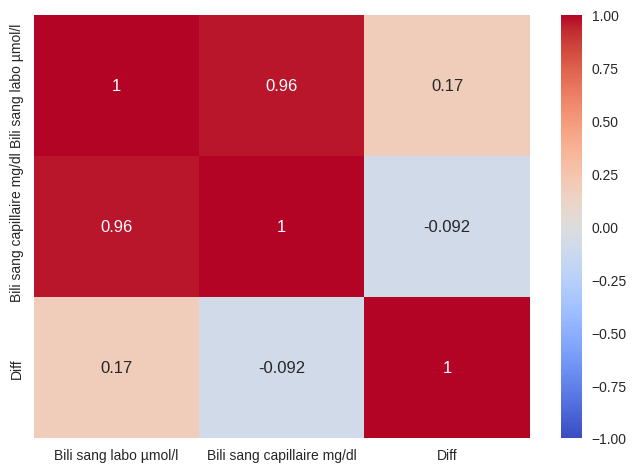

In [16]:
#correlation between the 2 features
sns.heatmap(df2.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, annot_kws={'size': 12}, cmap='coolwarm')

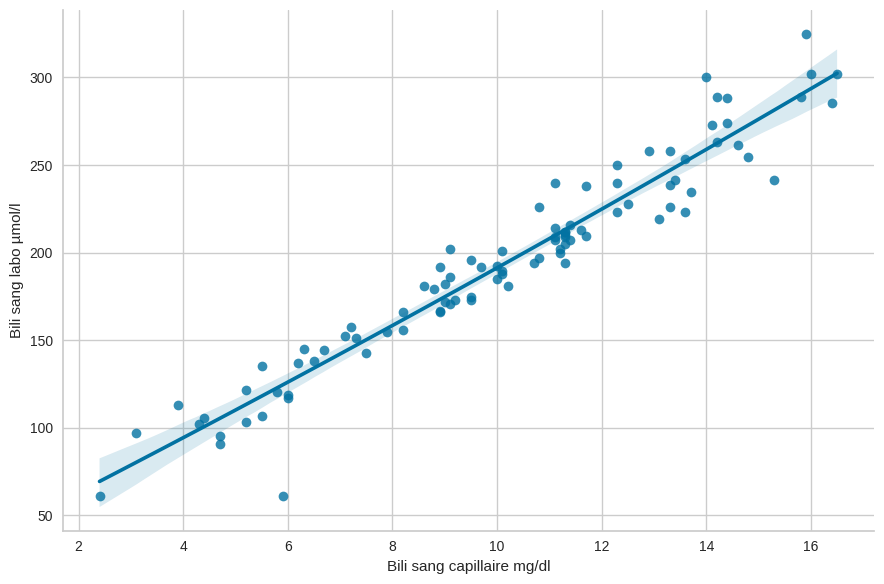

In [17]:
# Simple linear regression between Lab bili and POC bili
sns.lmplot(x='Bili sang capillaire mg/dl', y='Bili sang labo µmol/l', data=df2, height=6, aspect=1.5, order = 2)

In [18]:
# identify how many patients had more than 10µmol/l difference between POC bili and Lab bili
df2_10 = df2[abs(df2['Bili sang labo µmol/l'] - 17.1*df2['Bili sang capillaire mg/dl']) > 10]
df2_10.shape

(84, 3)

84 patients have more than 10 points difference between Lab and POC bili

In [19]:
# identify how many patients had more than 20µmol/l difference between bili sang capillaire and bili sang labo
df2_20 = df2[abs(df2['Bili sang labo µmol/l'] - 17.1*df2['Bili sang capillaire mg/dl']) >= 20]
df2_20.shape

(45, 3)

45 patients have more than 20 points difference between Lab and POC bili

In [20]:
#  identify how many patients had more than 10µmol/l and less than 20 difference between bili sang capillaire and bili sang labo
df2_10_20 = df2[(abs(df2['Bili sang labo µmol/l'] - 17.1*df2['Bili sang capillaire mg/dl']) > 10) &
             (abs(df2['Bili sang labo µmol/l'] - 17.1*df2['Bili sang capillaire mg/dl']) < 20)]
df2_10_20.shape

(39, 3)

39 patients had beween 10 and 20 points difference between Lab and POC bili

In [21]:
#percentage of difference >20
np.round((df2_20.shape[0]) / df2.shape[0] * 100, 1)

47.9

48% patients have a difference of more than 20 between Lab and POC bili

In [22]:
# # identify how many patients had more than 30µmol/l difference between bili sang capillaire and bili sang labo
df2_30 = df2[abs(df2['Bili sang labo µmol/l'] - 17.1*df2['Bili sang capillaire mg/dl']) >= 30]
df2_30.shape

(26, 3)

26 patients have more than 30 points difference between Lab and POC bili

In [23]:
#percentage of difference >30
np.round((df2_30.shape[0]) / df2.shape[0] * 100, 1)

27.7

28% patients have a difference of more than 30 between Lab and POC bili

In [24]:
# create new column in df3 with bins refeclecting difference between POC bili an Lab bili
bins = [0, 10, 20, 30, 40,100]
labels = ['0-10', '10-20', '20-30', '30-40', '>40']
df2['Bin_Diff'] = pd.cut(df2['Bili sang labo µmol/l'] - 17.1*df2['Bili sang capillaire mg/dl'], bins=bins, labels=labels)
df2.head()


,Bili sang labo µmol/l,Bili sang capillaire mg/dl,Diff,Bin_Diff
0,106.90,5.5,7.882353,10-20
1,142.80,7.5,9.000000,10-20
2,285.26,16.4,3.800000,0-10
3,241.40,13.4,8.000000,10-20
4,262.99,14.2,12.700000,20-30


## Impact of Hb level on the difference magnitude between POC bili and Lab bili measurements

<Axes: xlabel='Bin_Diff'>

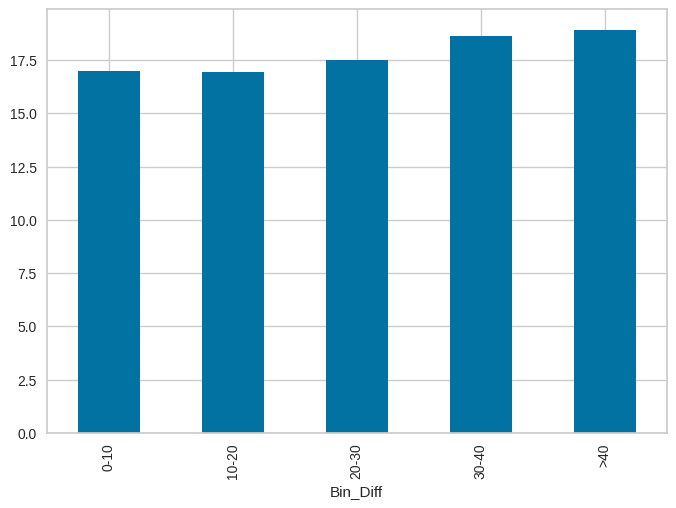

In [25]:
# Some units report that higher Hb is correlated with more error from the cap bili....
# Convert 'Hb (g/dl' column to numeric, handling non-numeric values
df2['Hb (g/dl'] = pd.to_numeric(df1['Hb (g/dl'], errors='coerce')
# creat graph showing bins in abcisse and mean Hb as y axis
df2.groupby('Bin_Diff')['Hb (g/dl'].mean().plot(kind='bar')


There is a trend showing that higher Hb is correlated with higher differences between lab and POC bilirubin

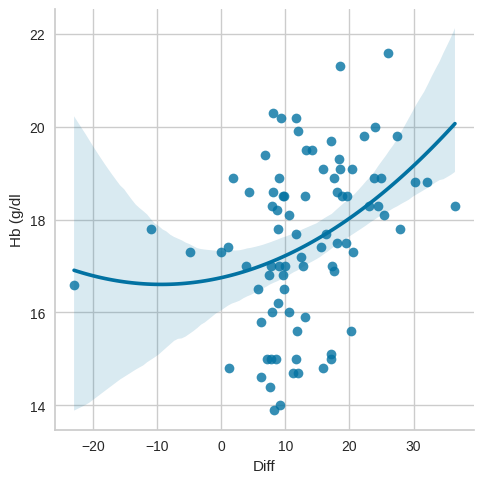

In [26]:
#scatterplot with abcisse Diff_value and y axis Hb
sns.lmplot(x='Diff', y='Hb (g/dl', data=df2, order=2)

However, there a great spread of the data far from the order 2 regression line. **Hb level will thus not be used in our model to predict Lab bili from POC bili**

<Axes: >

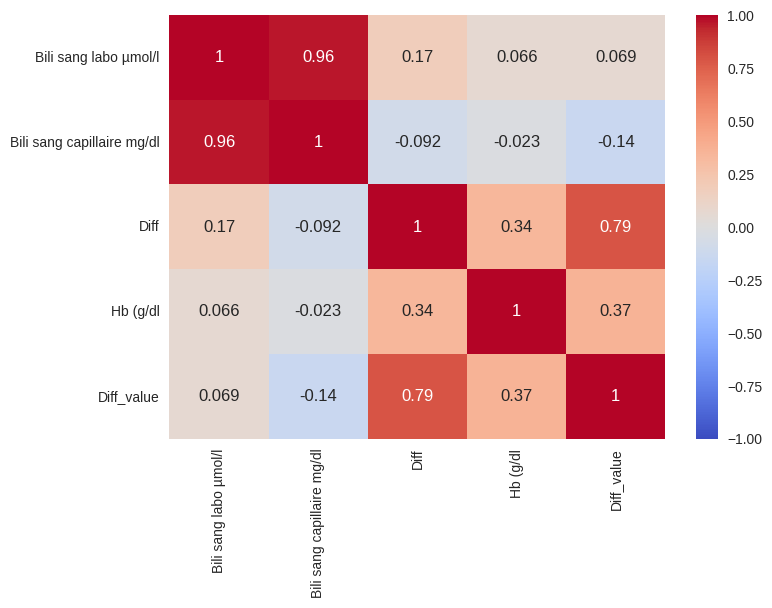

In [27]:
# correlation map between features
# Convert 'Diff' column to a numerical representation
df2['Diff_value'] = np.round(abs(17.1*df2['Bili sang capillaire mg/dl']- df2['Bili sang labo µmol/l']),1)

# Calculate correlation matrix excluding non-numerical columns
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Show correlation heatmap
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, annot_kws={'size': 12}, cmap='coolwarm')

POC bili and Lab bili are highly correlated (Pearson correlation coefficient = 0.96) as previously suggested by the regression line graph. There is come correlation between the differences and Hb level but this can not be used individually as there is a great variance in the results

In [ ]:
#Calculating the exact value of the difference bewteen POC and Lab bili in µmol/l
df2['Diff_value'] = np.round(abs(17.1*df2['Bili sang capillaire mg/dl']- df2['Bili sang labo µmol/l']),1)
df2.head()

,Bili sang labo µmol/l,Bili sang capillaire mg/dl,Diff,Bin_Diff,Hb (g/dl,Diff_value
0,106.90,5.5,7.882353,10-20,16.0,12.8
1,142.80,7.5,9.000000,10-20,17.0,14.6
2,285.26,16.4,3.800000,0-10,17.0,4.8
3,241.40,13.4,8.000000,10-20,20.3,12.3
4,262.99,14.2,12.700000,20-30,17.0,20.2


In [ ]:
#How frequent it is that POC bili is more than Lab bili
np.round(df2[df2['Bili sang labo µmol/l'] < 17.1*df2['Bili sang capillaire mg/dl']].shape[0] / df2.shape[0],2)

0.05

In 5% of the cases, POC bili is higher than Lab bili. So most of the time (95%) POC bili underestimates Lab bili

In [ ]:
# when difference between bili capillaire and Bili labo is >20 how often is it that bili capillaire is above bili sang
np.round(df2[(df2['Bili sang labo µmol/l'] < 17.1*df2['Bili sang capillaire mg/dl']) & (df2['Diff_value'] > 20)].shape[0] / df2.shape[0],2)

0.02


For extreme difference values > 20, in 98% of cases Lab bili is above instantaneous bilirubin. So even for extreme differences, POC bilirubin underestimates Lab bili


 **As a conclusion, we should asume that most of the time, POC bili underestimates Lab bili**

 **If we didn't apply a predictive model, the risk of error of more than 20 points between Lab and POC bili would occur in 48% patients.**

## **Building a prediction model: predicting Lab bili from POC bili**

In [28]:
# Creating a prediction model: linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your data is in a DataFrame called 'df3'
X = df2[['Bili sang capillaire mg/dl']]
y = df2['Bili sang labo µmol/l']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)

Root Mean Squared Error: 18.038732006413404
Mean Squared Error: 325.3958523992034


In [ ]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 22.695288073226322
Coefficient: 16.805679756687248


**So the linear model is:**

**Bili sang labo (µmol/l) = bili capillaire (mg/dl) x 17 + 23**

**Root mean squared error 18**

# Graphic representation of the regression line

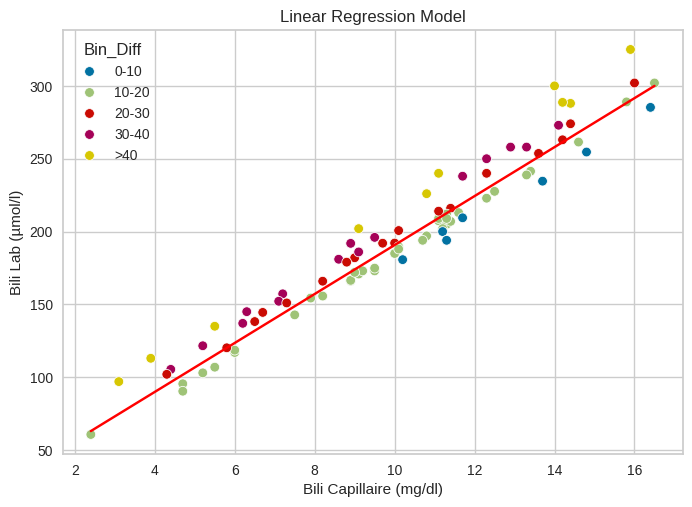

In [29]:
# Scatter plot of the original data
sns.scatterplot(x='Bili sang capillaire mg/dl', y='Bili sang labo µmol/l', data=df2, hue = 'Bin_Diff')

# Generate points for the regression line
x_range = np.linspace(df2['Bili sang capillaire mg/dl'].min(), df2['Bili sang capillaire mg/dl'].max(), 100)
y_pred_line = model.intercept_ + model.coef_[0] * x_range

# Plot the regression line
plt.plot(x_range, y_pred_line, color='red')

plt.xlabel('Bili Capillaire (mg/dl)')
plt.ylabel('Bili Lab (µmol/l)')
plt.title('Linear Regression Model')
plt.show()

Main concern is that POC bili values with higest differences with Lab bili undertestimate Lab bili. There is a risk of making a wrong clinical decision: not to give treatment when this is needed (10 patients/94). This simple model is not performant enough

# Quadratic model (order 2 polynomial regression model) and simplified linear regression model

**Model and performance**

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming you have X_test, y_test from your previous code
# Assuming your data is in a DataFrame called 'df3'
X = df2[['Bili sang capillaire mg/dl']]
y = df2['Bili sang labo µmol/l']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Create and Fit Quadratic Model ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)  # Transform training data for polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)  # Fit the model on transformed data

# --- Quadratic Model RMSE ---
y_pred_poly = model_poly.predict(poly.transform(X_test))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("RMSE of Quadratic Model:", rmse_poly)

# --- Simple Model RMSE ---
# Access the 'Bili sang capillaire mg/l' column from the original df3 DataFrame, using the index of X_test to select the corresponding rows.
for i in range (20,30):
  y_pred_simple = 17*df2.loc[X_test.index, 'Bili sang capillaire mg/dl'] + i
  rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
  print("RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + {}):".format(i), rmse_simple)

RMSE of Quadratic Model: 17.94411587039923
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 20): 18.467051598369515
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 21): 18.085219175657755
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 22): 17.75157205788591
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 23): 17.468871412345234
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 24): 17.239623728950395
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 25): 17.065983247692653
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 26): 16.94965905572331
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 27): 16.891835305851163
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 28): 16.893112735512563
RMSE of Simple Model (Bili Labo = 17*Bili Capillaire + 29): 16.95347798504701


**Lowest RMSE is for the following linear model:**

**Lab bili= 17*POC bili + 27 in µmol/l**

In [31]:
# Intercept and coefficients for the quadratic model
print("Intercept:", model_poly.intercept_)
print("Coefficient:", model_poly.coef_)

Intercept: 25.58356928479418
Coefficient: [ 0.         16.17844688  0.03088432]


**Quadratic model:**

**Lab bili= 25.58 + 16.18*POC bili + 0.03*(POC bili)**2**

## Graphic representation of the 3 prediction models

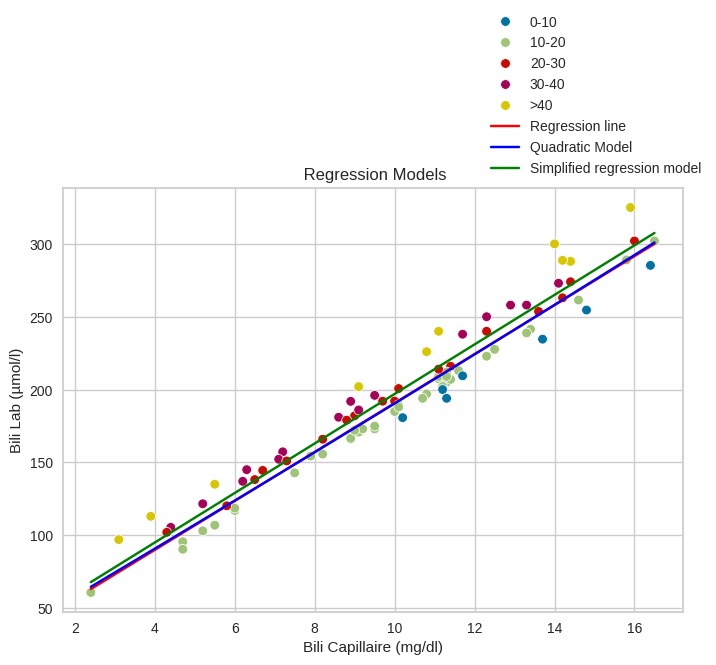

In [34]:
# Scatter plot of the original data
sns.scatterplot(x='Bili sang capillaire mg/dl', y='Bili sang labo µmol/l', data=df2, hue = 'Bin_Diff')

# Generate points for the regression line
x_range = np.linspace(df2['Bili sang capillaire mg/dl'].min(), df2['Bili sang capillaire mg/dl'].max(), 100)
y_pred_line = model.intercept_ + model.coef_[0] * x_range

# Plot the regression line
plt.plot(x_range, y_pred_line, color='red', label = 'Regression line')


# quadratic model
# Generate predictions for the quadratic model across the full x_range
x_range_poly = poly.transform(x_range.reshape(-1, 1))  # Transform x_range for polynomial features
y_pred_poly_full = model_poly.predict(x_range_poly)  # Predict for the entire range
plt.plot(x_range, y_pred_poly_full, color='blue', label = 'Quadratic Model')  # Plot the quadratic model


# simple model
# Recalculate y_pred_simple for the full x_range (assuming you want to use the best 'i' from previous calculations)
best_i = 27
y_pred_simple = 17 * x_range + best_i
plt.plot(x_range, y_pred_simple, color='green', label = 'Simplified regression model')  # Now plot with the full range

plt.xlabel('Bili Capillaire (mg/dl)')
plt.ylabel('Bili Lab (µmol/l)')
plt.title(' Regression Models')

# Adjust legends
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 1))

plt.show()

## Interactive graph and reliability of the simplified resgression model

In [38]:
import plotly.express as px
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame 'df'
# Replace 'x_col' and 'y_col' with the actual column names from your DataFrame
x = df['Bili sang labo µmol/l']
y = df['Bili sang capillaire mg/dl']

# Reshape the data for the LinearRegression model
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Create the Plotly Express figure with trendline
fig = px.scatter(df, x='Bili sang capillaire mg/dl', y='Bili sang labo µmol/l',
                 trendline="ols")

# Access the regression results (this part is a bit more involved with Plotly)
results = px.get_trendline_results(fig)
intercept = results.iloc[0]["px_fit_results"].params[0]
coefficient = results.iloc[0]["px_fit_results"].params[1]

# --- Use X_test to calculate y_pred for RMSE ---
y_pred_rmse = coefficient * X_test + intercept  # Use X_test for RMSE calculation


# Print the intercept and coefficients
print("Intercept:", intercept)
print("Coefficient:", coefficient)
print("R-squared:", model.score(x, y))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rmse)))

fig.show()

Intercept: 25.004302995072955
Coefficient: 16.688972470229626
R-squared: 0.9319306572762167
RMSE: 17.593312544502748


I needed to build a tool that would be easy to use by the nurses. An equation was not that simple for everyone. In addition, the POC bili results is given in mg/dl and Lab bili for clinical decision in µmol/l.

I have thus proposed this graphic model: nurses plot their result on the line and it will automatically provide the predicted Lab bili with lowest risk of error.

In [39]:
import plotly.express as px
import numpy as np

# Assuming you want to use df2 and the same x and y variables as before
x_col = 'Bili sang capillaire mg/dl'
y_col = 'Bili sang labo µmol/l'

# Given intercept and coefficient
intercept = 27
coefficient = 17

# --- Use X_test to calculate y_pred for RMSE ---
y_pred_rmse = coefficient * X_test + intercept  # Use X_test for RMSE calculation


# Generate x_range for the line
x_range = np.linspace(df2[x_col].min(), df2[x_col].max(), 100)
y_pred = coefficient * x_range + intercept  # Calculate y values using the linear equation

# Create the Plotly Express figure with scatter plot
fig = px.scatter(df2, x=x_col, y=y_col,
                 title="Linear Model with Plotly Express")

# Add the linear model line
fig.add_scatter(x=x_range, y=y_pred, mode='lines', name='Linear Model',
                line=dict(color='red'))

print("Intercept:", intercept)
print("Coefficient:", coefficient)
print("R-squared:", model.score(x, y))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rmse)))


fig.show()

Intercept: 27
Coefficient: 17
R-squared: 0.9319306572762167
RMSE: 16.891835305851163


# Final graph to be used by the medical team

In [40]:
import plotly.express as px
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you want to use df2 and the same x and y variables as before
x_col = 'Bili sang capillaire mg/dl'
y_col = 'Bili sang labo µmol/l'

# Given intercept and coefficient
intercept = 27
coefficient = 17

# --- Use X_test to calculate y_pred for RMSE ---
y_pred_rmse = coefficient * X_test + intercept  # Use X_test for RMSE calculation

# Generate x_range for the line (for visualization)
x_range = np.linspace(df2[x_col].min(), df2[x_col].max() +5, 100)
y_pred = coefficient * x_range + intercept  # Calculate y values using the linear equation

# Create the Plotly Express figure with scatter plot
fig = px.scatter()


# Add the linear model line
fig.add_scatter(x=x_range, y=y_pred, mode='lines', name='Linear Model',
                line=dict(color='red'))
fig.update_layout(
    title='Correlation between POC bili (mg/dl) and Lab bili (micromoles/l)',
    xaxis_title='POC bili (mg/dl)',
    yaxis_title='Lab bili (micromoles/l)',
    xaxis_tickformat=".2f",  # Format x-axis tick labels to 2 decimal places
    yaxis_tickformat=".2f"   # Format y-axis tick labels to 2 decimal places
)



print("Intercept:", intercept)
print("Coefficient:", coefficient)
print("R-squared:", model.score(x, y))  # Assuming 'model', 'x', and 'y' are still defined from previous cells
# --- Calculate RMSE using y_pred_rmse ---
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rmse)))

fig.show()


Intercept: 27
Coefficient: 17
R-squared: 0.9319306572762167
RMSE: 16.891835305851163


In [41]:
import plotly.io as pio

pio.write_html(fig, file='/content/drive/MyDrive/Bilirubine/my_graph.html', auto_open=True)

So 3 models have been tested:

**Linear model: Y = 16.8 * X +22.7**,     rmse = 18.0

**Quadratic model: Y= 25.5 + 16.7* X + 0.03 Xsqr2**,    rmse = 17.9

**Simplified model: Y = 17 * X + 27**,     rmse = 18.891

The best model is thus the quadratic model.

However, **our priority is not to miss patients who need treatment**, eg minimizing the risk of predicted Lab bili more than 20 below the true lab bili.

We quantified this risk below:

In [ ]:
# Predict values using the simple model
df2['Predicted_Bili_Lab'] = 17*(df2[['Bili sang capillaire mg/dl']]) + 27

# Flag events where actual lab bilirubin is more than 20 above predicted
df2['High_Diff'] = (df2['Bili sang labo µmol/l'] - df2['Predicted_Bili_Lab']) > 30


# Count events with high difference
num_high_diff = df2['High_Diff'].sum()
print("Number of events with lab bilirubin more than 20 above predicted:", num_high_diff)

# Calculate the percentage of events with high difference
percentage_high_diff = (num_high_diff / len(df2)) * 100
print("Percentage of events with lab bilirubin more than 20 above predicted:", percentage_high_diff)



Number of events with lab bilirubin more than 20 above predicted: 1
Percentage of events with lab bilirubin more than 20 above predicted: 1.0638297872340425


In [45]:
# Predict number of events where difference between Bili sang labo µmol/l is 20 or more than 17.1*Bili sang capillaire mg/dl using the quadratic model
#Predict Values Using Quadratic Model:
df2['Predicted_Bili_Lab_Quadratic'] = model_poly.predict(poly.transform(df2[['Bili sang capillaire mg/dl']]))

#Calculate Difference: Calculate the difference between the predicted values and '17.1 * Bili sang capillaire mg/dl'.
df2['Diff_Quadratic'] = abs(df2['Predicted_Bili_Lab_Quadratic'] - 17.1 * df2['Bili sang capillaire mg/dl'])

#Count Events: Count the number of events where the calculated difference is 20 or more.
num_events_high_diff_quadratic = df2[df2['Diff_Quadratic'] >= 20].shape[0]
print("Number of events with difference >= 20 (Quadratic Model):", num_events_high_diff_quadratic)

# Calculate the percentage of events with high difference
percentage_high_diff_quadratic = (num_events_high_diff_quadratic / len(df2)) * 100
print("Percentage of events with lab bilirubin more than 20 above predicted with quadratic model:", np.round(percentage_high_diff_quadratic,2))

Number of events with difference >= 20 (Quadratic Model): 26
Percentage of events with lab bilirubin more than 20 above predicted with quadratic model: 27.66


With the simplified model the risk of having a predicted bili of more than 20 below the true lab bili is 1.06%.
With the quadratic model, this risk is 27.66%

I have thus choosen the **simplified model**

Simplified model: Y = 17 * X + 27,

Root mean squared error = 18.891

R2 = 0.93

Risk of POC bili underestimating Lab bili of more than 20: 1%

